In [50]:
from yahoo_fin import stock_info as si
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
ticker = "GLD"
startDate = '1/1/2001'
endDate = '2/3/2023'
df = si.get_data(ticker, start_date = startDate, end_date=endDate)

In [54]:
df

,open,high,low,close,adjclose,volume,ticker
2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000,GLD
2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300,GLD
2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000,GLD
2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200,GLD
2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100,GLD
...,...,...,...,...,...,...,...
2023-01-27,179.270004,179.720001,178.259995,179.220001,179.220001,5446400,GLD
2023-01-30,179.289993,179.429993,178.649994,178.759995,178.759995,4210700,GLD
2023-01-31,178.820007,179.699997,178.539993,179.410004,179.410004,5976900,GLD
2023-02-01,179.750000,181.729996,178.630005,181.669998,181.669998,7996000,GLD


In [16]:
highest_swing = -1
lowest_swing = -1
for i in range(1,df.shape[0]-1):
    if df['High'][i] > df['High'][i-1] and df['High'][i] > df['High'][i+1] and (highest_swing == -1 or df['High'][i] > df['High'][highest_swing]):
        highest_swing = i
        
    if df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and (lowest_swing == -1 or df['Low'][i] < df['Low'][lowest_swing]):
        lowest_swing = i

In [30]:
ratios = [0,0.236, 0.382, 0.5 , 0.618, 0.786,1]
colors = ["black","r","g","b","cyan","magenta","yellow"]
levels = []
max_level = df['High'][highest_swing]
min_level = df['Low'][lowest_swing]
for ratio in ratios:
    if highest_swing > lowest_swing: # Uptrend
        levels.append(max_level - (max_level-min_level)*ratio)
    else: # Downtrend
        levels.append(min_level + (max_level-min_level)*ratio)

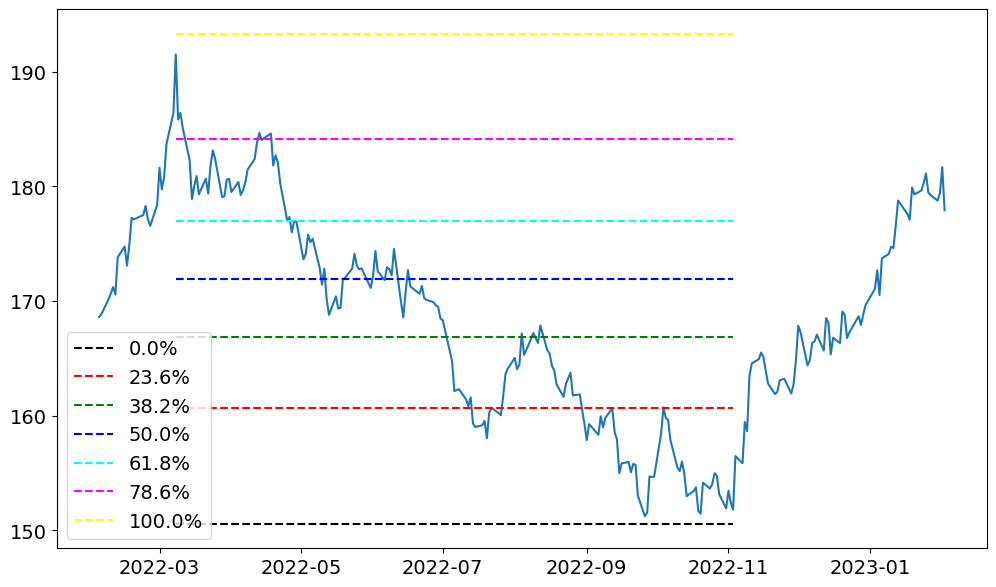

In [18]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
plt.plot(df['Close'])
start_date = df.index[min(highest_swing,lowest_swing)]
end_date = df.index[max(highest_swing,lowest_swing)]
for i in range(len(levels)):
    plt.hlines(levels[i],start_date, end_date,label="{:.1f}%".format(ratios[i]*100),colors=colors[i], linestyles="dashed")
plt.legend()
plt.show()

In [47]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-02-03 00:00:00-05:00,168.309998,168.820007,167.029999,168.600006,10650800,0.0,0.0,0.0
2022-02-04 00:00:00-05:00,168.039993,169.100006,167.990005,168.860001,9619600,0.0,0.0,0.0
2022-02-07 00:00:00-05:00,169.449997,170.300003,169.190002,170.110001,7796900,0.0,0.0,0.0
2022-02-08 00:00:00-05:00,170.100006,170.779999,169.949997,170.630005,5802000,0.0,0.0,0.0
2022-02-09 00:00:00-05:00,170.679993,171.419998,170.550003,171.210007,8002800,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-01-27 00:00:00-05:00,179.270004,179.720001,178.259995,179.220001,5446400,0.0,0.0,0.0
2023-01-30 00:00:00-05:00,179.289993,179.429993,178.649994,178.759995,4210700,0.0,0.0,0.0
2023-01-31 00:00:00-05:00,178.820007,179.699997,178.539993,179.410004,5976900,0.0,0.0,0.0


In [35]:
from eodhd import EODHDGraphs
graphs = EODHDGraphs()

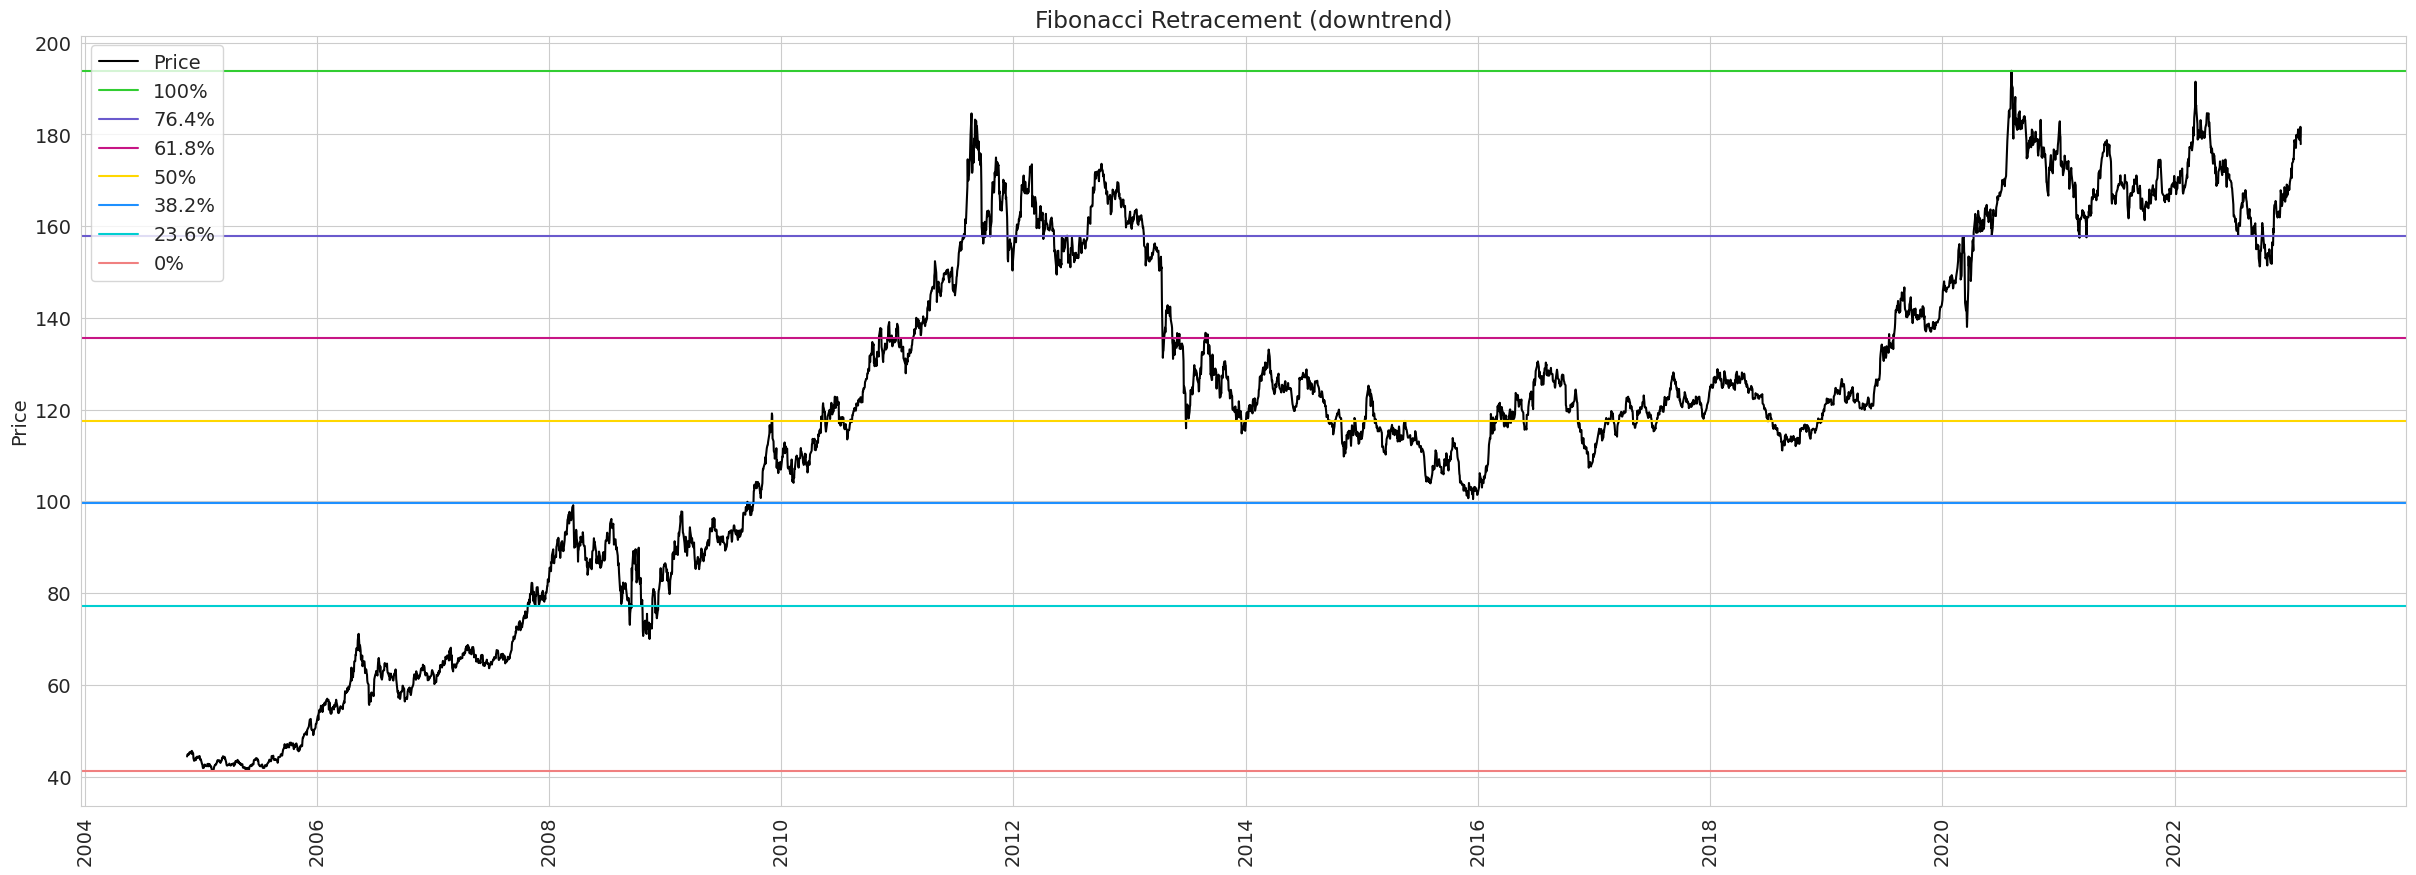

In [61]:
#df = df.rename(columns={"adjclose":"adjusted_close"})
graphs.fibonacci_retracement(df, "downtrend", "adjusted_close")

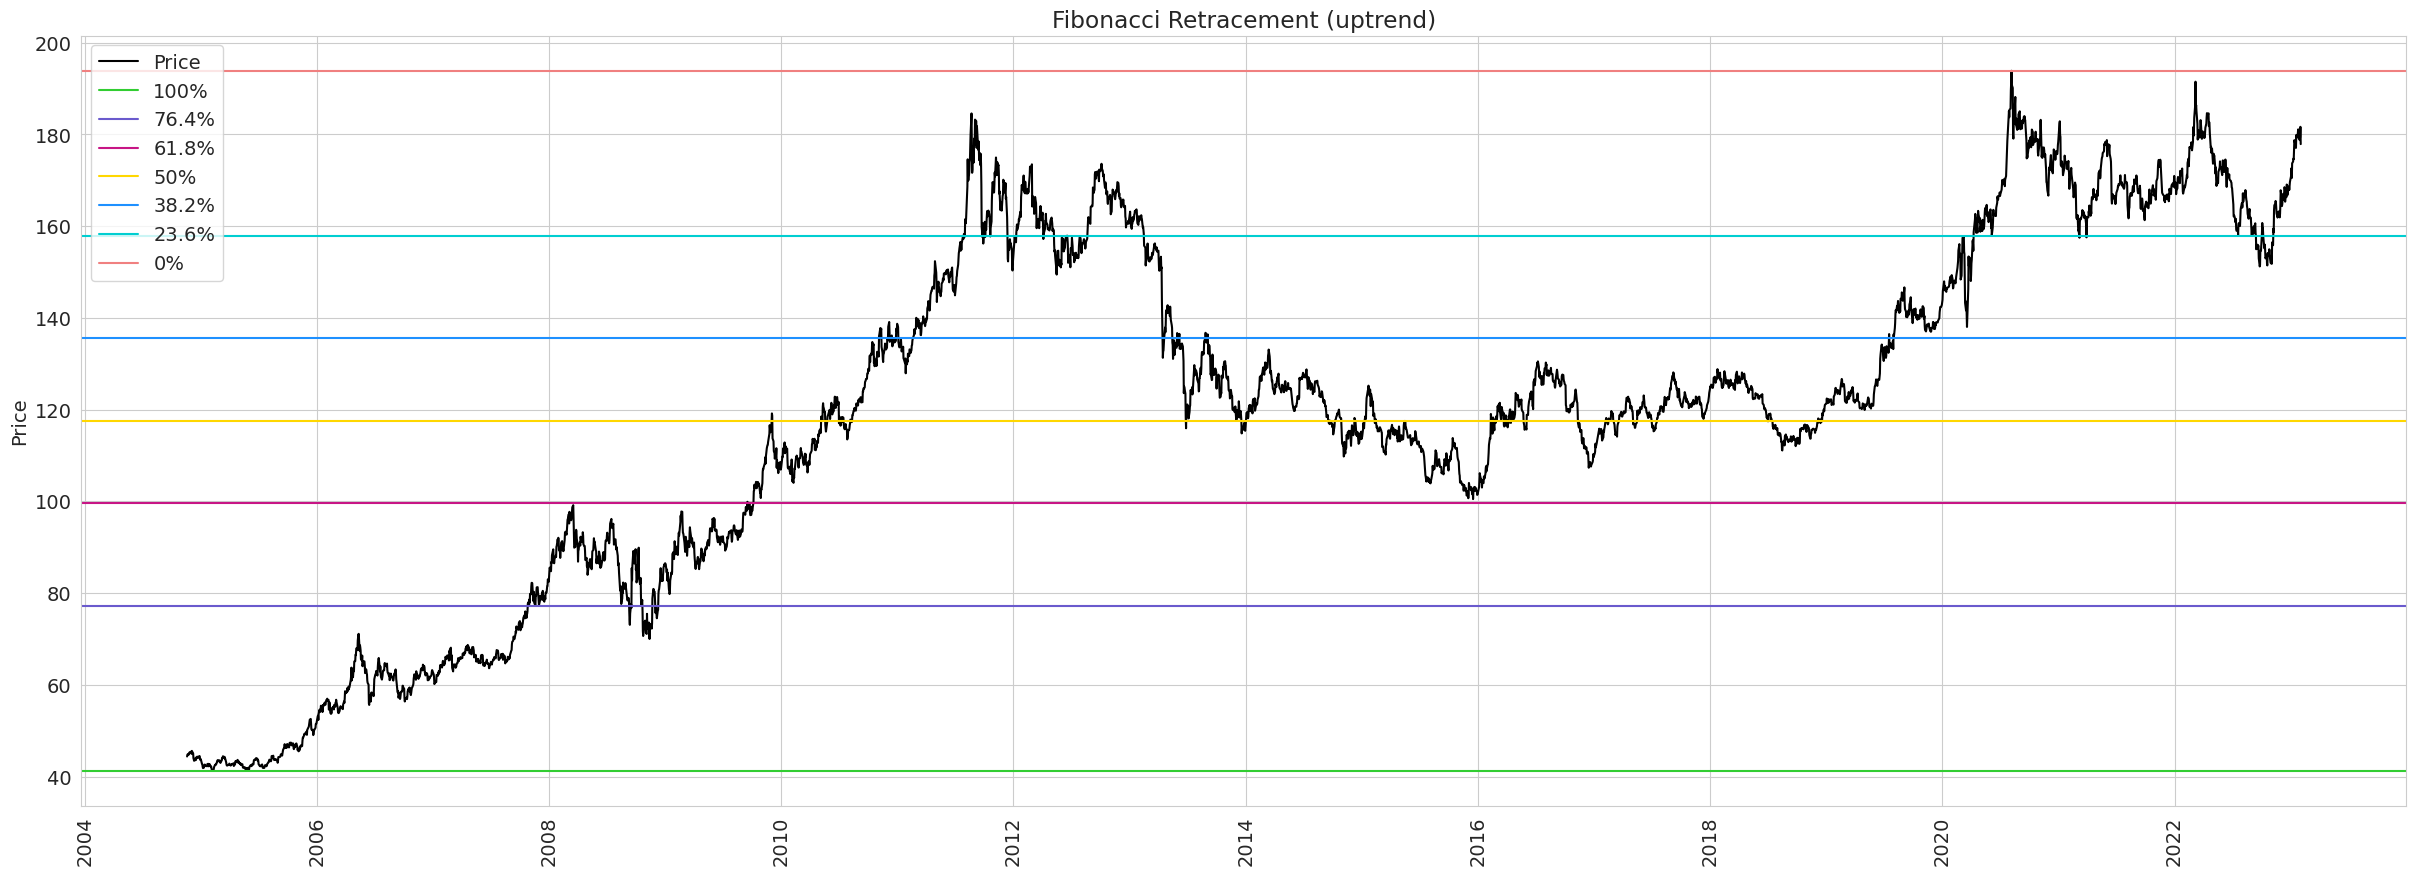

In [62]:
graphs.fibonacci_retracement(df, "uptrend", "adjusted_close")